In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hexagon_utilities import *
import matplotlib.pyplot as plt

### Create ColorLists for Use.

Named colors are useful.

In [3]:
import matplotlib.colors as mcolors
colors_d = mcolors.CSS4_COLORS
# Sort colors by hue, saturation, value and name
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))), name)
                for name, color in colors_d.items())
mcolor_names = [name for hsv, name in by_hsv] #pluck the names, sorted by HSV



BLACK_WHITES = mcolor_names[:13]
RED_BROWNS = mcolor_names[14:29]
BROWNS = mcolor_names[29:36]
BEIGES = mcolor_names[36:49]
YELLOWS = mcolor_names[50:64]
GREENS = mcolor_names[64:81]
CYANS = mcolor_names[85: 99]
BLUES = mcolor_names[100:121]
PURPLES = mcolor_names[122:132]
PINKS = mcolor_names[132:145]

red_inds = [21, 22, 23, 24, 25, 26, 27, 145]
REDS = [mcolor_names[x] for x in red_inds]


color_sets = [REDS, PINKS, PURPLES, BLUES, CYANS, GREENS, YELLOWS, BEIGES, BROWNS, RED_BROWNS, BLACK_WHITES]

# Let's write (Annotate) xyz coords of each hexagon

## How does this effect work:

- 1. We make a dictionary of colors (randomly chosen) and fractional size (for ever-shrinking) hexagons
- 2. For each hexagonal space, we loop through and plot the 5 hexagons, big to small
- 3. For a cooler effect, I rotate each smaller hexagon by 30 degrees (pi/6)

In [4]:
def save_file(title=None, details=None):
    SAVE_FILE = True
    if SAVE_FILE:
        fn = ''
        if title is not None:
            fn += title
            
        if details is not None:
            fn+= details
            
        dtstr = datetime.now().strftime("%Y-%m-%d_%H-%M-%S_%p")

            
        plt.savefig(f'../images/{fn+dtstr}.jpg')

In [5]:
save_file()

<Figure size 432x288 with 0 Axes>

In [6]:
def label(xy, text):
    y = xy[1] - 0.15  # shift y-value for label so that it's below the artist
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=10)

In [7]:
hx = Hex(10, 10, 3, flat=True)

hx.yc = 1
hx.xc = -1
print(hx.xc, hx.yc)

-1 1


(-10.0, 10.0, -8.0, 8.0)

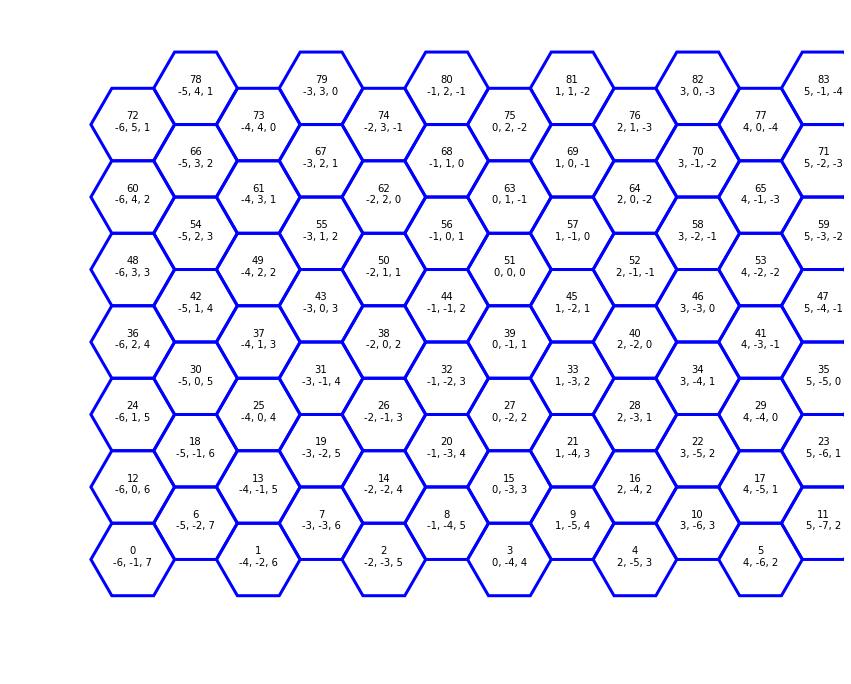

In [11]:
fig, ax = plt.subplots(figsize=(15,15))

#color_size_dict = {'blue': 0.9, 'red': 0.8, 'black': 0.6, 'white': 0.2}


#Let's specify sizes and colors for the inner hexagons
inner_hexes = 8
palette = REDS + BLUES + YELLOWS
colors = np.random.choice(palette, inner_hexes) #select 5
fracs = np.arange(1,0, step=-1/inner_hexes) # step size to reduce hexagon by

#keep a dictionary ready
color_size_dict = dict(zip(colors, fracs))
hg = HexGrid(14,6,1, flat=True)

for idx, h in enumerate(hg.hlist):
    h.render(fill=None, lw=3, color='blue')
    lab = str(idx) +'\n' + ', '.join([str(c) for c in (h.xc,h.yc,h.zc)])
    label((h.x,h.y), lab)

    
ax.axis('scaled')
ax.set_xlim(-10, 10)
ax.set_ylim(-8, 8)
plt.axis('off')


#save_file('Inset_')

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4]